In [1]:
import numpy as np
import time

import numpy as np
import statistics
import scipy as sp
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from dis_utils import *
from knn_utils import *

In [2]:
X=np.loadtxt('inDrop1.txt',dtype=int)

C:\Users\rossoneri\AppData\Local\Temp\ipykernel_21360\1824917054.py:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  X=np.loadtxt('inDrop1.txt',dtype=int)


In [169]:
l=np.array([1,2,3,4,5,5,5])
c=np.array([1,2,3,4,-1,2,0,-4])
# np.where(l==np.max(l))
# np.min(c[c!=np.min(c)])
m=np.sort(c)
np.where(c==1)[0][0]

0

In [8]:
time_start = time.time()
dis1=pdist(X,metric='cityblock')
dis1=squareform(dis1)
time_end = time.time() 
time_sum = time_end - time_start
print(time_sum)
time_start = time.time()
cell,gene=X.shape
dis=np.zeros((cell,cell))
for i in range(cell):
    for j in range(i+1,cell):
        dis[i,j]=np.linalg.norm(X[i]-X[j],1)
dis=dis+dis.T
time_end = time.time() 
time_sum = time_end - time_start
print(time_sum)
print(dis-dis1)

0.18958544731140137
2.3419835567474365
[[ 0.00000000e+00 -3.97903932e-13  1.13686838e-13 ... -3.41060513e-13
   2.27373675e-13 -1.13686838e-13]
 [-3.97903932e-13  0.00000000e+00  5.68434189e-14 ... -2.27373675e-13
  -2.84217094e-13  4.54747351e-13]
 [ 1.13686838e-13  5.68434189e-14  0.00000000e+00 ...  2.84217094e-13
   1.70530257e-13  1.70530257e-13]
 ...
 [-3.41060513e-13 -2.27373675e-13  2.84217094e-13 ...  0.00000000e+00
   0.00000000e+00 -2.84217094e-13]
 [ 2.27373675e-13 -2.84217094e-13  1.70530257e-13 ...  0.00000000e+00
   0.00000000e+00 -1.13686838e-13]
 [-1.13686838e-13  4.54747351e-13  1.70530257e-13 ... -2.84217094e-13
  -1.13686838e-13  0.00000000e+00]]


In [181]:
pull_num,sigma,delta,number_of_arms,dim=1 ,-3.589999999999999 ,0.01 ,1937, 19093
delta=delta/number_of_arms/(dim/10)
print(delta)
delta=np.sqrt(2*sigma*np.log(2/2.7039347469161694e-09)/pull_num)
print(2*sigma*np.log(2/2.7039347469161694e-09))

2.7039347469161694e-09
-146.62784184022252


C:\Users\rossoneri\AppData\Local\Temp\ipykernel_5944\548440758.py:4: RuntimeWarning: invalid value encountered in sqrt
  delta=np.sqrt(2*sigma*np.log(2/2.7039347469161694e-09)/pull_num)


In [186]:
arr = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 5, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0,
 4, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0,
 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0])
np.sum(np.sum(arr**2)/len(arr)-(np.sum(arr)/len(arr))**2),np.var(arr)

(0.8696000000000002, 0.8695999999999999)

In [17]:
import numpy as np
import scipy as sp
# from bmo_utils import *

b_arm_amount=5
a_arm_amount=5
pull_dim_once=500
def cal_CB(pull_num,var,delta,number_of_arms,dim):
    delta=delta/number_of_arms/(dim/pull_dim_once)
    return np.sqrt(2*var*np.log(2/delta)/pull_num)

class UCB:
    def __init__(self,arm_array,delta,n_best_arms=10,n_extra_arms=10,sample_size=100):
        self.dim=len(arm_array[0])
        self.number_of_arms = len(arm_array)
        self.delta=delta
        self.number_of_best_arms = n_best_arms
        self.arm_states = [{'pulls' : 0,
        'sum' : 0.0,
        'sum_of_squares' : 0.0,
        'ucb' : np.inf,
        'lcb' : -np.inf,
        'est_mean' : 0.0,
        'select_status':0} for i in range(self.number_of_arms)]
        self.arms = arm_array
        self.B=[]


    
    def pull_arm(self,arm,ucb,lcb):
        dim=self.dim
        if(self.arm_states[arm]['select_status']==1):
            ucb[arm]=-np.inf
            lcb[arm]=np.inf
            self.arm_states[arm]['pulls']+=1
            return
        if(self.arm_states[arm]['pulls']>=int((dim-1)/pull_dim_once)):
#             print("overflow",np.average(self.arms[arm]))
            temp=np.average(self.arms[arm])
            self.arm_states[arm]['est_mean']=temp
            self.arm_states[arm]['ucb']=temp
            self.arm_states[arm]['lcb']=temp
            ucb[arm]=temp
            lcb[arm]=temp
            self.arm_states[arm]['pulls']+=1
            self.arm_states[arm]['sum']=temp*dim 
            self.arm_states[arm]['sum_of_squares']=np.sum(self.arms[arm]**2)
        else:
            temp_pull=np.random.randint(0,dim-1,pull_dim_once)
            temp_pull=self.arms[arm][temp_pull]
            s=np.sum(temp_pull)
            self.arm_states[arm]['pulls']+=1
            self.arm_states[arm]['sum']+=s
            self.arm_states[arm]['sum_of_squares']+=np.sum(temp_pull**2)

            sigma=self.arm_states[arm]['sum_of_squares']/(pull_dim_once)/self.arm_states[arm]['pulls']-(self.arm_states[arm]['sum']/pull_dim_once/self.arm_states[arm]['pulls'])**2

            CB=cal_CB(self.arm_states[arm]['pulls'],sigma,self.delta,self.number_of_arms,self.dim)
#             print(CB)
            theta=self.arm_states[arm]['sum']/self.arm_states[arm]['pulls']/10
            self.arm_states[arm]['ucb']=theta+CB
            self.arm_states[arm]['lcb']=theta-CB
            ucb[arm]=theta+CB
            lcb[arm]=theta-CB
#             print(CB)
        return
            
    def cal_directly(self):
        print('directly calculate')
        arm_mean=[]
        for i in self.arm_states:
            arm_mean.append(i['est_mean'])
        arm_mean_2=arm_mean.copy()
        arm_mean_2=np.sort(arm_mean_2)
        knn=[]
        for i in range(self.number_of_best_arms):
            knn.append(np.where(arm_mean==arm_mean_2[i])[0][0])
        return knn
        
        
    def pull_arms_loop(self):
        t=0
        l=0
        while(l<self.number_of_best_arms):

            ucb,lcb=self.pull_everyarm_once()
#             print(ucb,lcb)
            t+=1
            print(np.sort(ucb),np.sort(lcb))
            print(ucb[np.where(lcb==np.min(lcb))],np.where(lcb==np.min(lcb)))
            if (self.check_SB(ucb,lcb)):
                l+=1
#                 print('add 1 to B')
#                 print("self.number_of_best_arms",l,self.number_of_best_arms)
#                 print("pull_time:",self.arm_states[1]['pulls'])
            if(t>=int((self.dim-1)/pull_dim_once)+1):
                self.B=self.cal_directly()
                
                break
            
        print('sdijai',self.B)
        return self.B
            
    def pull_everyarm_once(self):
        ucb=np.zeros(self.number_of_arms)
        lcb=np.zeros(self.number_of_arms)
        for i in range(self.number_of_arms):
            self.pull_arm(i,ucb,lcb)
        
        return ucb,lcb
    
    def check_SB(self,ucb,lcb):
        
        idx=np.where(lcb==np.min(lcb))[0][0]
        threshold=np.min(lcb[lcb!=np.min(lcb)])
        if(ucb[idx]<threshold):
            (self.B).append(idx)
            self.arm_states[idx]['select_status']=1
            return 1
        else:
            return 0
ucb_m=np.zeros([50,20])
lcb_m=np.zeros([50,20])
arm_assemb= UCB(abs(X-X[0]),0.1,5,0,1000)
# time_start = time.time()  
for i in range(50):
    ucb,lcb=arm_assemb.pull_everyarm_once()
    ucb_m[i]=ucb[:20]
    lcb_m[i]=lcb[:20]
# print(arm_assemb.arm_states[2]['ucb'])
# time_end = time.time() 
# time_sum = time_end - time_start 
# print(time_sum)
ucb_m,lcb_m

(array([[  0.        ,  52.53583675,  58.36573882,  41.4503658 ,
          62.36814277, 252.75697243,  39.16751526,  67.95220207,
          36.87459838,  70.74673228,  36.32030324, 147.07784266,
         145.04906363,  42.02429527,  36.19078888,  32.92624004,
          43.87110203,  36.60958033,  53.42544312,  50.59356906],
        [  0.        ,  48.99745206,  44.15488402,  52.93302536,
          45.85139475, 137.99906353, 156.06070075,  43.65915635,
          42.58731081,  49.17196227,  30.96901062,  98.05649594,
          91.78920484,  61.45837782,  35.1963978 ,  37.93556044,
          56.31007285,  69.139958  , 310.34833509,  47.57568676],
        [  0.        ,  44.36641175,  63.82657087,  44.65621299,
          38.45170884, 115.40614648, 122.18686552,  36.37808691,
          38.74422431,  44.18914101,  29.79876291,  79.3523514 ,
          77.38784435,  59.01083261,  40.54411963, 130.18575893,
          74.98769205,  56.1217939 , 217.40155023, 112.12989017],
        [  0.        ,

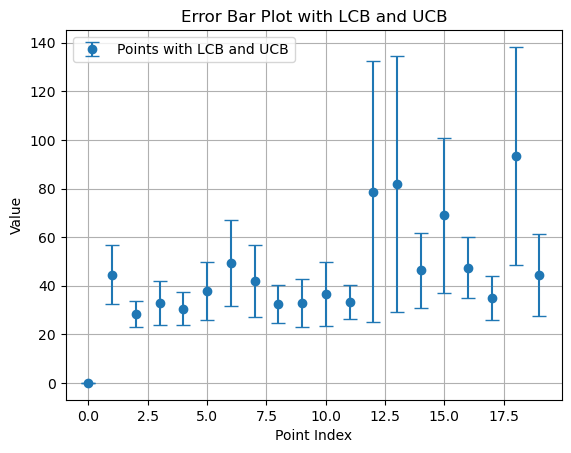

In [22]:
def plot_error_bars(ucb_list, lcb_list):
    if len(ucb_list) != len(lcb_list):
        raise ValueError("UCB 和 LCB 列表的长度必须相同")
    values = [(ucb + lcb) / 2 for ucb, lcb in zip(ucb_list, lcb_list)]
    error_lower = [value - lcb for value, lcb in zip(values, lcb_list)]
    error_upper = [ucb - value for value, ucb in zip(values, ucb_list)]
    points = np.arange(len(values))
    plt.errorbar(points, values, yerr=[error_lower, error_upper], fmt='o', capsize=5, label='Points with LCB and UCB')
    plt.xlabel('Point Index')
    plt.ylabel('Value')
    plt.title('Error Bar Plot with LCB and UCB')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_error_bars(ucb_m[15],lcb_m[15])

In [222]:
# import numpy as np

# def generate_gaussian_sequence(size, mean=0, std=1):
#     gaussian_sequence = np.random.normal(loc=mean, scale=std, size=size)
#     return gaussian_sequence
# size = 10000
# mean = np.random.rand(5)*100
# std = np.random.rand(5)*100
# X=np.zeros([1000,10000])
# for i in range(1000):
#     X[i] = generate_gaussian_sequence(size, mean[np.random.randint(0,4)], std[np.random.randint(0,4)])
# print("Generated Gaussian Sequence:")
# X=abs(X)
# X
X=np.loadtxt("inDrop1.txt",dtype=int)
Y=np.zeros((X.shape[0],X.shape[1]*10))
for i in range(10):
    print(i)
    Y[:,X.shape[1]*i:X.shape[1]*(i+1)]=X
Y
    

C:\Users\rossoneri\AppData\Local\Temp\ipykernel_5944\3930068871.py:15: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  X=np.loadtxt("inDrop1.txt",dtype=int)


0
1
2
3
4
5
6
7
8
9


array([[0., 4., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 4., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [231]:
z=np.zeros(len(Y))
for i in range(len(z)):
    z[i]=np.mean(Y[i])
np.sort(z)

array([0.06777353, 0.06887341, 0.07259205, ..., 1.41549259, 1.41711622,
       1.6726549 ])

In [3]:
import numpy as np
import scipy as sp
# from bmo_utils import *

b_arm_amount=5
a_arm_amount=5
pull_dim_once=100
def cal_CB(pull_num,var,delta,number_of_arms,dim):
    delta=delta/number_of_arms/(dim/pull_dim_once)
    return np.sqrt(2*var*np.log(2/delta)/pull_num)

class UCB_sparse:
    def __init__(self,arm_array,delta,n_best_arms=10,n_extra_arms=10,sample_size=100):
        self.dim=len(arm_array[0])
        self.number_of_arms = len(arm_array)
        self.delta=delta
        self.number_of_best_arms = n_best_arms
        self.arm_states = [{'pulls' : 0,
        'sum' : 0.0,
        'sum_of_squares' : 0.0,
        'ucb' : np.inf,
        'lcb' : -np.inf,
        'est_mean' : 0.0,
        'select_status':0} for i in range(self.number_of_arms)]
        self.arms = arm_array
        self.B=[]
        self.I=[]
        for i in range(self.number_of_arms):
            m=self.arms[i]
            (self.I).append(m[m!=0])
       
    
    def pull_arm(self,arm,ucb,lcb):
        if(self.arm_states[arm]['select_status']==1):
            ucb[arm]=-np.inf
            lcb[arm]=np.inf
            self.arm_states[arm]['pulls']+=1
            return
        if(self.arm_states[arm]['pulls']>=int((dim-1)/pull_dim_once)):
            
#             print("overflow",np.average(self.arms[arm]))
            temp=np.average(self.arms[arm])
            self.arm_states[arm]['est_mean']=temp
            self.arm_states[arm]['ucb']=temp
            self.arm_states[arm]['lcb']=temp
            ucb[arm]=temp
            lcb[arm]=temp
            self.arm_states[arm]['pulls']+=1
            self.arm_states[arm]['sum']=temp*dim 
            self.arm_states[arm]['sum_of_squares']=np.sum(self.arms[arm]**2)
        else:
#             print(arm)
#             temp_pull=np.random.randint(0,dim-1,pull_dim_once)
#             temp_pull=self.arms[arm][temp_pull]
            if(len(self.I[arm])!=0):
                temp_pull=np.random.choice(self.I[arm], size=pull_dim_once)
            else:
                temp_pull=np.linspace(0,1,pull_dim_once)
            
            s=np.sum(temp_pull)
            self.arm_states[arm]['pulls']+=1
            self.arm_states[arm]['sum']+=s
            self.arm_states[arm]['sum_of_squares']+=np.sum(temp_pull**2)

            sigma=self.arm_states[arm]['sum_of_squares']/(pull_dim_once)/self.arm_states[arm]['pulls']-(self.arm_states[arm]['sum']/pull_dim_once/self.arm_states[arm]['pulls'])**2

            CB=cal_CB(self.arm_states[arm]['pulls'],sigma,self.delta,self.number_of_arms,self.dim)
#             print(CB)
            theta=self.arm_states[arm]['sum']/self.arm_states[arm]['pulls']/10
            self.arm_states[arm]['ucb']=theta+CB
            self.arm_states[arm]['lcb']=theta-CB
            ucb[arm]=theta+CB
            lcb[arm]=theta-CB
        return
            
    def cal_directly(self):
        print('directly calculate')
        arm_mean=[]
        for i in self.arm_states:
            arm_mean.append(i['est_mean'])
        arm_mean_2=arm_mean.copy()
        arm_mean_2=np.sort(arm_mean_2)
        knn=[]
        for i in range(self.number_of_best_arms):
            knn.append(np.where(arm_mean==arm_mean_2[i])[0][0])
        return knn
        
        
    def pull_arms_loop(self):
        t=0
        l=0
        while(l<self.number_of_best_arms):
#             print('loop begin')
            ucb,lcb=self.pull_everyarm_once()
#             print(ucb,lcb)
            t+=1
            print((np.sort(ucb)),(np.sort(lcb)))
            print(ucb[np.where(lcb==np.min(lcb))],np.where(lcb==np.min(lcb)))
            if (self.check_SB(ucb,lcb)):
                l+=1
                print('add 1 to B')
                print("self.number_of_best_arms",l,self.number_of_best_arms)
                print("pull_time:",self.arm_states[1]['pulls'])
            if(t>=int((self.dim-1)/pull_dim_once)+1):
                self.B=self.cal_directly()
                
                break
            
        print('sdijai',self.B)
        return self.B
            
    def pull_everyarm_once(self):
        ucb=np.zeros(self.number_of_arms)
        lcb=np.zeros(self.number_of_arms)
        for i in range(self.number_of_arms):
            self.pull_arm(i,ucb,lcb)
        
        return ucb,lcb
    
    def check_SB(self,ucb,lcb):
        
        idx=np.where(lcb==np.min(lcb))[0][0]
        new_lb=np.zeros(len(lcb)-1)
        new_lb[:idx]=lcb[:idx]
        new_lb[idx:]=lcb[idx+1:]
        threshold=np.min(new_lb)
        if(ucb[idx]<threshold):
            (self.B).append(idx)
            self.arm_states[idx]['select_status']=1
            return 1
        else:
            return 0
arm_assemb= UCB_sparse(abs(X-X[1]),0.1,5,0,1000)
time_start = time.time()     
arm_assemb.pull_arms_loop()
time_end = time.time() 
time_sum = time_end - time_start 
print(time_sum)

NameError: name 'dim' is not defined

In [ ]:
arm_assemb= UCB_sparse(abs(X-X[1]),0.1,5,0,1000)
arm_assemb.pull_ever